In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# define some values 

l = 0.7e-2    # meters
p = 0.05     # xenon pressure in Torr, or 6.67 Pa
resistanceshield = 100     # ohms
resistanceplate = 10000     # ohms
resistanceshielderror = 5     # ohms
resistanceplateerror = 500     # ohms

In [3]:
# load in all data for set 2, make sure everything is in volts
# note: we removed the first data point of each forward set, as later on we must calculate sqrt(V - Vs) and Vs > V for the first data point

# room temperature forward
V = np.loadtxt('/data/Set2/V.txt')[1:]
roomVs = (0.001)*np.loadtxt('/data/Set2/RVs.txt')[1:]
roomVserr = (0.001)*np.loadtxt('/data/Set2/RVserr.txt')[1:]
roomVp = (0.001)*np.loadtxt('/data/Set2/RVp.txt')[1:]
roomVperr = (0.001)*np.loadtxt('/data/Set2/RVperr.txt')[1:]

# frozen out forward
frozenVs = (0.001)*np.loadtxt('/data/Set2/FVs.txt')[1:]
frozenVserr = (0.001)*np.loadtxt('/data/Set2/FVserr.txt')[1:]
frozenVp = (0.001)*np.loadtxt('/data/Set2/FVp.txt')[1:]
frozenVperr = (0.001)*np.loadtxt('/data/Set2/FVperr.txt')[1:]

# reverse data
reverseV = np.loadtxt('/data/Set2/Vrev.txt')
reverseVabs = np.loadtxt('/data/Set2/Vrevabs.txt')
reverseVs = (0.001)*np.loadtxt('/data/Set2/Vsrev.txt')
reverseVserr = (0.001)*np.loadtxt('/data/Set2/Vsreverr.txt')
reverseVp = (0.001)*np.loadtxt('/data/Set2/Vprev.txt')
reverseVperr = (0.001)*np.loadtxt('/data/Set2/Vpreverr.txt')

In [4]:
# calculating errors

# current I
def Ierr(I, v, dv, r, dr):    # I, v, dr are arrays but r and dr are simply integers
    ans=np.zeros(len(v))
    for i in range(0,len(ans)):
        ans[i]=I[i]*np.sqrt((dv[i]/v[i])**2 + (dr/r)**2 )
    return ans

# scattering probability P
def Perr(P, RIs, dRIs, RIp, dRIp, FIs, dFIs, FIp, dFIp):   # R and F denote room temperature and frozen data respectively
    ans=np.zeros(len(P))
    for i in range(0,len(ans)):
        ans[i]=P[i]*np.sqrt((dRIs[i]/RIs[i])**2 + (dRIp[i]/RIp[i])**2 + (dFIs[i]/FIs[i])**2 + (dFIp[i]/FIp[i])**2)
    return ans

# contact potential Vc
def Verr(V, m1, dm1, c1, dc1, m2, dm2, c2, dc2):
    return V*np.sqrt((dm1/m1)**2 + (dc1/c1)**2 + (dm2/m2)**2 + (dc2/c2)**2)

# electron momentum
def emerr(em, Vs, dVs, Vcontact, dVcontact, Venergy, dVenergy):
    ans=np.zeros(len(Vs))
    for i in range(0,len(ans)):
        ans[i]=(0.5)*em[i]*np.sqrt((dVs[i]/Vs[i])**2 + (dVcontact/Vcontact)**2 + (dVenergy/Venergy)**2)
    return ans

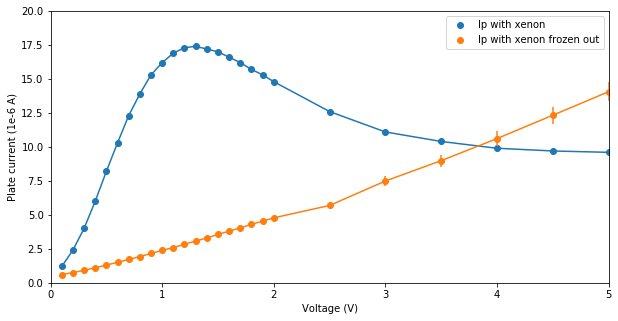

In [5]:
# Graph 1

roomIp = roomVp/resistanceplate
frozenIp = frozenVp/resistanceplate
roomIperr = Ierr(roomIp,roomVp,roomVperr,resistanceplate,resistanceplateerror)
frozenIperr = Ierr(frozenIp,frozenVp,frozenVperr,resistanceplate,resistanceplateerror)

plt.figure(figsize = (10,5))
plt.errorbar(V,10*roomIp*(1e6),yerr=roomIperr*(1e6))   # multiply by 10 to get graph similar in manual
plt.scatter(V,10*roomIp*(1e6),label='Ip with xenon')
plt.errorbar(V,frozenIp*(1e6),yerr=frozenIperr*(1e6))
plt.scatter(V,frozenIp*(1e6),label='Ip with xenon frozen out')
plt.ylabel('Plate current (1e-6 A)')
plt.xlabel('Voltage (V)')
plt.xlim(0,5)
plt.ylim(0,20)
plt.legend();

In [21]:
Pserr

array([ 0.07557935,  0.04152687,  0.02598404,  0.01630476,  0.00899436,
        0.00745551,  0.00665591,  0.00892884,  0.0125875 ,  0.01824267,
        0.0226042 ,  0.02884999,  0.03461124,  0.04036809,  0.04571872,
        0.05076039,  0.05506137,  0.0593625 ,  0.06263099,  0.06589522,
        0.0778039 ,  0.08412856,  0.08787443,  0.09031559,  0.09184299,
        0.09291481,  0.09354259,  0.09396002,  0.09410753,  0.09424243,
        0.09419129,  0.09411841,  0.09392669,  0.09358879,  0.09298632,
        0.09203929,  0.09084882,  0.08932399,  0.08734707,  0.08426762,
        0.07815477,  0.01684452, -0.0305431 , -0.071588  , -0.0691814 ,
       -0.04876516])

Minimum scattering probability occurs at 8.24257e-01 (+-) 2.001e-04 sqrt(V)


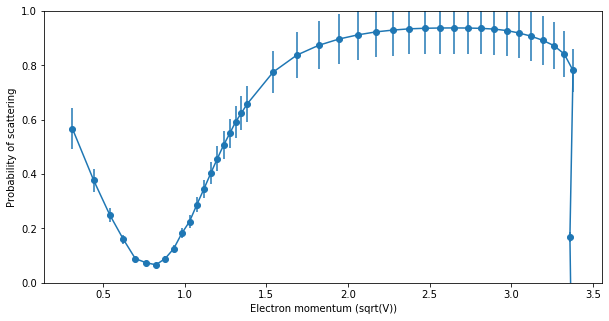

In [6]:
# Graph 2

roomIs = roomVs/resistanceshield
frozenIs = frozenVs/resistanceshield
roomIserr = Ierr(roomIs,roomVs,roomVserr,resistanceshield,resistanceshielderror)
frozenIserr = Ierr(frozenIs,frozenVs,frozenVserr,resistanceshield,resistanceshielderror)

# probability of scattering
Ps = 1 - (roomIp*frozenIs)/(frozenIp*roomIs)
Pserr = Perr(Ps, roomIs, roomIserr, roomIp, roomIperr, frozenIs, frozenIserr, frozenIp, frozenIperr)

emomentum = np.sqrt(V - roomVs)
emomentumerr = emerr(emomentum, roomVs, roomVserr, 1, 0, 1, 0)   # Vc and Ve are not considered yet

plt.figure(figsize = (10,5))
plt.errorbar(emomentum,Ps,xerr=emomentumerr,yerr=Pserr)
plt.scatter(emomentum,Ps)
plt.ylabel('Probability of scattering')
plt.xlabel('Electron momentum (sqrt(V))')
print('Minimum scattering probability occurs at ' f'{emomentum[6]:.5e} (+-) {emomentumerr[6]:.3e} sqrt(V)')
plt.ylim(0,1);   # ionisation occurs around x=3.3/3.4

Max mean free path length occurs at 1.02227e-01 (+-) 1.028e-02 m


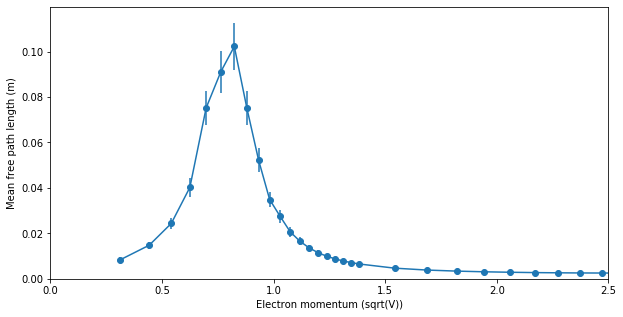

In [7]:
# inital mean free path values

mfp = -l/np.log(1-Ps)
mfperr = mfp*Pserr/Ps

plt.figure(figsize = (10,5))
plt.errorbar(emomentum,mfp,xerr=emomentumerr,yerr=mfperr)
plt.scatter(emomentum,mfp)
plt.ylabel('Mean free path length (m)')
plt.xlabel('Electron momentum (sqrt(V))')
print('Max mean free path length occurs at ' f'{mfp[6]:.5e} (+-) {mfperr[6]:.3e} m')
plt.xlim(0,2.5)
plt.ylim(0,);

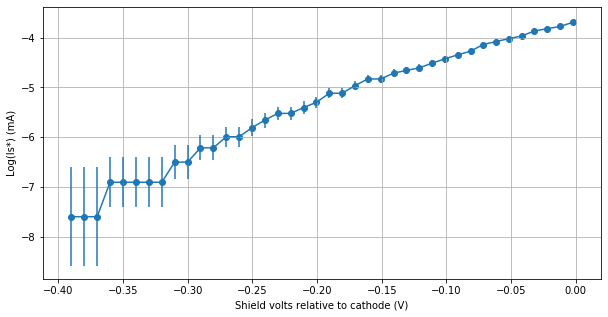

In [8]:
# Graph 3
# work in mA

reverseIs = (1e3)*reverseVs[:40]/resistanceshield   # remove data points with 0 Vs to allow for log calculation
reverseIserr = Ierr(reverseIs,reverseVs[:40],reverseVserr[:40],resistanceshield,resistanceshielderror)

plt.figure(figsize = (10,5))
plt.errorbar(reverseV[:40]-reverseVs[:40], np.log(reverseIs), xerr=reverseVserr[:40], yerr=reverseIserr/reverseIs)
plt.scatter(reverseV[:40]-reverseVs[:40], np.log(reverseIs))
plt.ylabel('Log(Is*) (mA)')
plt.xlabel('Shield volts relative to cathode (V)')
plt.grid();

In [9]:
# average of 3 and 5 points on same y level

a=reverseVs[:40]
a=np.delete(a, 39)
a=np.delete(a, 37)
a=np.delete(a, 36)
a=np.delete(a, 35)
a=np.delete(a, 33)
a=np.delete(a, 32)

b=reverseVserr[:40]
b=np.delete(b, 39)
b=np.delete(b, 37)
b=np.delete(b, 36)
b=np.delete(b, 35)
b=np.delete(b, 33)
b=np.delete(b, 32)

d=reverseV[:40]
d=np.delete(d, 39)
d=np.delete(d, 37)
d=np.delete(d, 36)
d=np.delete(d, 35)
d=np.delete(d, 33)
d=np.delete(d, 32)

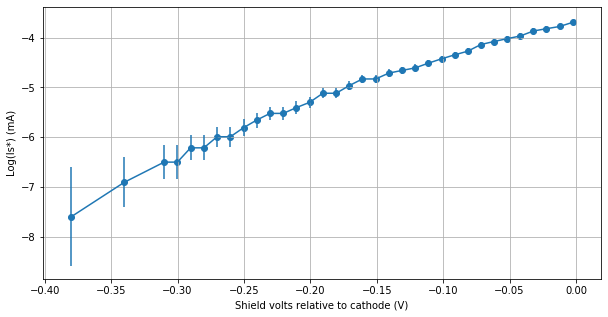

In [10]:
# Graph 3 with recurring points filtered out

reverseIs = (1e3)*a/resistanceshield   
reverseIserr = Ierr(reverseIs,a,b,resistanceshield,resistanceshielderror)

plt.figure(figsize = (10,5))
plt.errorbar(d-a, np.log(reverseIs), xerr=b, yerr=reverseIserr/reverseIs)
plt.scatter(d-a, np.log(reverseIs))
plt.ylabel('Log(Is*) (mA)')
plt.xlabel('Shield volts relative to cathode (V)')
plt.grid();

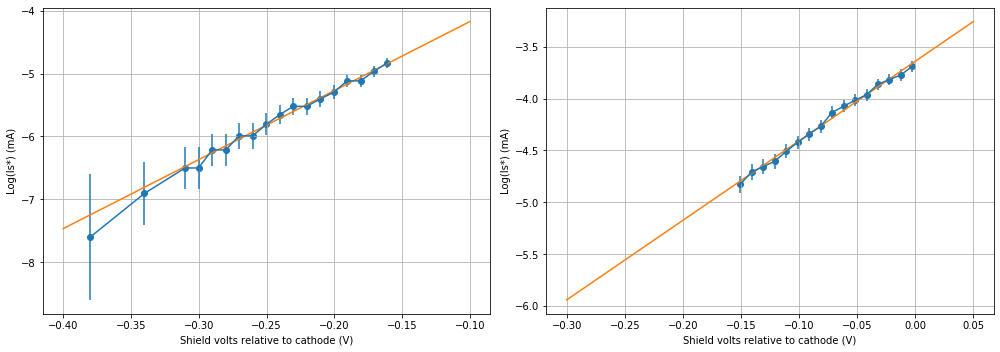

In [11]:
# finding Vc and Ve from graph 3

from scipy.optimize import curve_fit

def func(x, m, c):
    return m*x + c

reverseIs1 = reverseIs[16:]
reverseIs2 = reverseIs[:16]
reverseIserr1 = Ierr(reverseIs1,a[16:],b[16:],resistanceshield,resistanceshielderror)
reverseIserr2 = Ierr(reverseIs2,a[:16],b[:16],resistanceshield,resistanceshielderror)

x1=np.linspace(-0.4,-0.1,1000)
x2=np.linspace(-0.3,0.05,1000)
guess1=np.array([11.9,-9.8])   # manipulate until a good estimate for line parameters has been found
guess2=np.array([7.4,-10.6])
popt1, pcov1=curve_fit(func, d[16:]-a[16:], np.log(reverseIs1), p0=guess1, sigma=reverseIserr1/reverseIs1, absolute_sigma=False)
popt2, pcov2=curve_fit(func, d[:16]-a[:16], np.log(reverseIs2), p0=guess2, sigma=reverseIserr2/reverseIs2, absolute_sigma=False)
yfit1 = func(x1, popt1[0], popt1[1])
yfit2 = func(x2, popt2[0], popt2[1])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5)) 

ax1.errorbar(d[16:]-a[16:], np.log(reverseIs1), xerr=b[16:], yerr=reverseIserr1/reverseIs1)
ax1.scatter(d[16:]-a[16:], np.log(reverseIs1)) 
ax1.plot(x1,yfit1)
ax1.set(ylabel = 'Log(Is*) (mA)', xlabel = 'Shield volts relative to cathode (V)') 

ax2.errorbar(d[:16]-a[:16], np.log(reverseIs2), xerr=b[:16], yerr=reverseIserr2/reverseIs2)
ax2.scatter(d[:16]-a[:16], np.log(reverseIs2)) 
ax2.plot(x2,yfit2)
ax2.set(ylabel = 'Log(Is*) (mA)', xlabel = 'Shield volts relative to cathode (V)') 

plt.tight_layout()

ax1.grid()
ax2.grid();

In [12]:
# Solution for calculating χ2 sum, reduced χ2 and χ2 P-value for function 1

from scipy.stats import chi2 

def chi2func1(x,y,yerr):
    yexpected=func(x, popt1[0], popt1[1])
    return np.sum(np.square((y-yexpected)/yerr))

a1=chi2func1(d[16:]-a[16:], np.log(reverseIs1), reverseIserr1/reverseIs1)   # chi2 value
v1=len(reverseIs1)-2   # number of constraints = 2
rchi21=a1/v1   # reduced chi2 value
P1=chi2.sf(a1, v1)  # P value

print('chi2=' ,a1)
print('reduced chi2=' ,rchi21)
print('P-value=' ,P1)

chi2= 1.8815962541178706
reduced chi2= 0.11759976588236691
P-value= 0.9999933740002959


In [13]:
# Solution for calculating χ2 sum, reduced χ2 and χ2 P-value for function 2

from scipy.stats import chi2 

def chi2func2(x,y,yerr):
    yexpected=func(x, popt2[0], popt2[1])
    return np.sum(np.square((y-yexpected)/yerr))

a2=chi2func2(d[:16]-a[:16], np.log(reverseIs2), reverseIserr2/reverseIs2)   # chi2 value
v2=len(reverseIs2)-2   # number of constraints = 2
rchi22=a2/v2   # reduced chi2 value
P2=chi2.sf(a2, v2)  # P value

print('chi2=' ,a2)
print('reduced chi2=' ,rchi22)
print('P-value=' ,P2)

chi2= 2.937678189896931
reduced chi2= 0.20983415642120937
P-value= 0.999178976122259


V thermionic= 1.36582e-01 (+-) 4.011e-02 V
V contact= -1.71036e-01 (+-) 6.743e-03 V


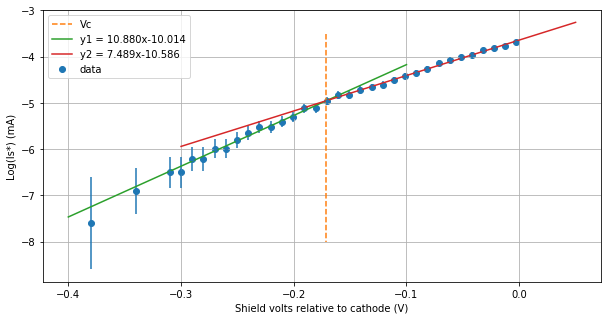

In [14]:
# finding Vc and Ve and visualising it

Vc = np.abs((popt2[1]-popt1[1])/(popt1[0]-popt2[0]))    # intersection of our two lines
Vcerr = Verr(Vc, popt1[0], np.sqrt(pcov1[0,0]), popt1[1], np.sqrt(pcov1[1,1]), popt2[0], np.sqrt(pcov2[0,0]), popt2[1], np.sqrt(pcov2[1,1]))
Ve = np.abs(-3/(2*popt1[0]))
Veerr = Ve*np.sqrt(pcov1[0,0])

plt.figure(figsize = (10,5))
plt.errorbar(d-a, np.log(reverseIs), xerr=b, fmt='.', yerr=reverseIserr/reverseIs)
plt.scatter(d-a, np.log(reverseIs), label='data')
plt.plot(-Vc*np.ones(1000),np.linspace(-3.5,-8,1000), '--', label='Vc')
plt.plot(x1,yfit1, label='y1 = 10.880x-10.014')
plt.plot(x2,yfit2, label='y2 = 7.489x-10.586')
plt.ylabel('Log(Is*) (mA)')
plt.xlabel('Shield volts relative to cathode (V)')
plt.grid()
plt.legend()

print('V thermionic= ' f'{Ve:.5e} (+-) {Veerr:.3e} V')
print('V contact= ' f'{-Vc:.5e} (+-) {Vcerr:.3e} V');

Minimum scattering probability occurs at 9.93488e-01 (+-) 1.472e-01 sqrt(V)


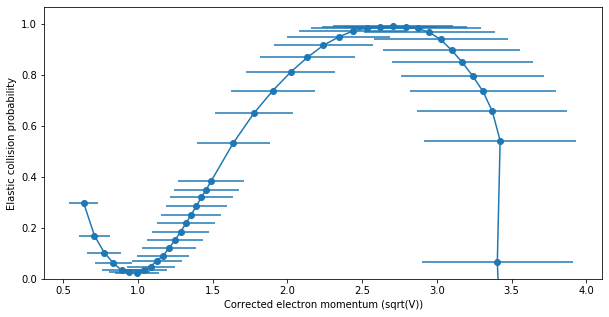

In [15]:
# Graph 4

# elastic collision probability
Pc = -(1/20)*p/l*np.log(1-Ps)     #normalise
Pcerr = (1/20)*Pserr/Ps 
emomentumfinal = np.sqrt(V - roomVs + Vc + Ve)
emomentumfinalerr = emerr(emomentumfinal, roomVs, roomVserr, Vc, Vcerr, Ve, Veerr)

plt.figure(figsize = (10,5))
plt.errorbar(emomentumfinal,Pc, xerr=emomentumfinalerr, yerr=Pcerr)
plt.scatter(emomentumfinal,Pc)
plt.ylabel('Elastic collision probability')
plt.xlabel('Corrected electron momentum (sqrt(V))')
print('Minimum scattering probability occurs at ' f'{emomentumfinal[6]:.5e} (+-) {emomentumfinalerr[6]:.3e} sqrt(V)')
plt.xlim()
plt.ylim(0,);

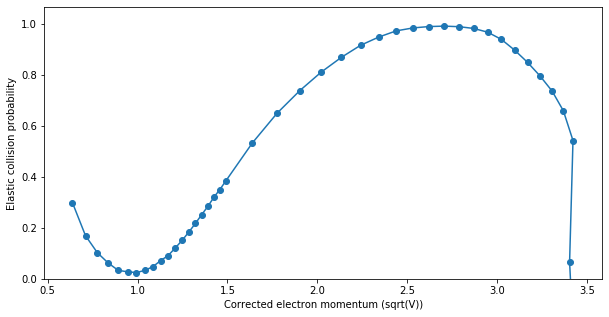

In [16]:
# Above graph without error bars

plt.figure(figsize = (10,5))
plt.errorbar(emomentumfinal,Pc)
plt.scatter(emomentumfinal,Pc)
plt.ylabel('Elastic collision probability')
plt.xlabel('Corrected electron momentum (sqrt(V))')
plt.xlim()
plt.ylim(0,);

Max mean free path length occurs at 1.02227e-01 (+-) 1.028e-02 m


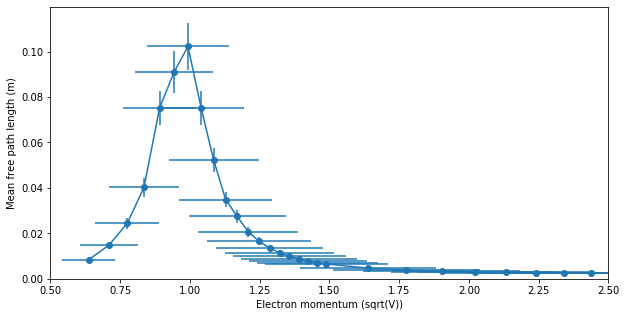

In [17]:
# mean free path values with corrected momentum

plt.figure(figsize = (10,5))
plt.errorbar(emomentumfinal,mfp,xerr=emomentumfinalerr,yerr=mfperr)
plt.scatter(emomentumfinal,mfp)
plt.ylabel('Mean free path length (m)')
plt.xlabel('Electron momentum (sqrt(V))')
print('Max mean free path length occurs at ' f'{mfp[6]:.5e} (+-) {mfperr[6]:.3e} m')
plt.xlim(0.5,2.5)
plt.ylim(0,);